In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
bank_df = pd.read_csv('./data/bank.csv')

In [3]:
bank_df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

# EDA

In [4]:
bank_df.describe().T

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b8457ae80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b84596518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b8457aa58>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b84596ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b84596ef0>],
 'means': []}

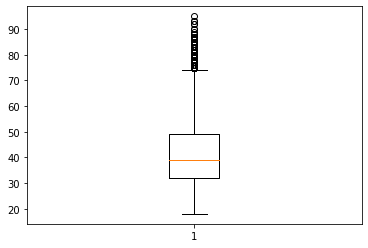

In [5]:
plt.boxplot(bank_df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b84559a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b844a24a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b844959e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b844a2b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b844a2e80>],
 'means': []}

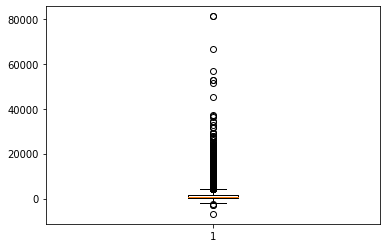

In [6]:
plt.boxplot(bank_df['balance'])

'''CART is not affected by outliers'''

In [7]:
# Unique values in catagorical columns
categorical_cols = list(bank_df.select_dtypes(include=['object']))
for col in categorical_cols:
    print(col)
    print(bank_df[col].value_counts())
    print('----------' * 3)

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
------------------------------
marital
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
------------------------------
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
------------------------------
default
no     10994
yes      168
Name: default, dtype: int64
------------------------------
housing
no     5881
yes    5281
Name: housing, dtype: int64
------------------------------
loan
no     9702
yes    1460
Name: loan, dtype: int64
------------------------------
contact
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
------------------------------
month
may    2824
aug    1

# Data Pre-Processing

In [8]:
def preprocess_data_labels(df):
    '''Encodes labels of columns in provided data frame'''
    res_df = df.copy()
    categorical_columns = res_df.select_dtypes(include=['object'])
    
    le = preprocessing.LabelEncoder()
    
    for col in categorical_columns:
        res_df[col] = le.fit_transform(res_df[col])
    
    return res_df

In [9]:
encoded_df = preprocess_data_labels(bank_df)

In [10]:
encoded_df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

# Split data into Train-Test

In [11]:
X = encoded_df.drop(['deposit'], axis=1).values
y = encoded_df['deposit'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Build the Decision Tree Model

In [13]:
# Decision tree with depth=2
model_dt_2 = DecisionTreeClassifier(max_depth=2)

In [14]:
model_dt_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
print('Training score: ', model_dt_2.score(X_train, y_train))
print('Testing score: ', model_dt_2.score(X_test, y_test))

Training score:  0.7091468307033967
Testing score:  0.7117263843648208


In [16]:
# Decision tree with depth=4
model_dt_4 = DecisionTreeClassifier(max_depth=4)
model_dt_4.fit(X_train, y_train)
print('Training score: ', model_dt_4.score(X_train, y_train))
print('Testing score: ', model_dt_4.score(X_test, y_test))

Training score:  0.7968708210751538
Testing score:  0.7782301845819761


In [17]:
# Decision tree with depth=8
model_dt_8 = DecisionTreeClassifier(max_depth=8, criterion='gini')
model_dt_8.fit(X_train, y_train)
print('Training score: ', model_dt_8.score(X_train, y_train))
print('Testing score: ', model_dt_8.score(X_test, y_test))

Training score:  0.8585183204065258
Testing score:  0.8029315960912052


In [18]:
# Decision tree with depth=9
model_dt_9 = DecisionTreeClassifier(max_depth=9, criterion='gini')
model_dt_9.fit(X_train, y_train)
print('Training score: ', model_dt_9.score(X_train, y_train))
print('Testing score: ', model_dt_9.score(X_test, y_test))

Training score:  0.8741642150307569
Testing score:  0.8132464712269273


In [19]:
# Decision tree with depth=10 (this reduced the testing score)
model_dt_10 = DecisionTreeClassifier(max_depth=10, criterion='gini')
model_dt_10.fit(X_train, y_train)
print('Training score: ', model_dt_10.score(X_train, y_train))
print('Testing score: ', model_dt_10.score(X_test, y_test))
'''We observe that testing score has been reduced. Hence, optimum depth seems to be 9.'''

Training score:  0.892350895961487
Testing score:  0.8048317046688382


'We observe that testing score has been reduced. Hence, optimum depth seems to be 9.'

In [20]:
# Decicion tree with entropy criteria (Information gain)
model_dt_entropy = DecisionTreeClassifier(max_depth=9, criterion='entropy')
model_dt_entropy.fit(X_train, y_train)
print('Training score: ', model_dt_entropy.score(X_train, y_train))
print('Testing score: ', model_dt_entropy.score(X_test, y_test))
'''We observe that testing score has increased with information gain / entropy criteria'''

Training score:  0.8581171436212891
Testing score:  0.8213897937024973


'We observe that testing score has increased with information gain / entropy criteria'

In [21]:
y_pred_dt = model_dt_entropy.predict_proba(X_test)[:,1]
y_pred_dt

array([0.        , 0.77358491, 0.89605735, ..., 0.49295775, 0.92537313,
       0.06006006])

# Graphical Representation of Tree

In [22]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [23]:
def plot_model_tree(model, file_name='tree'):
    plt.figure(figsize=(6,6))
    export_graphviz(model, out_file='./png/%s.dot' % file_name, filled=True, rounded=True, special_characters=True)
    call(['dot', '-Tpng', './png/%s.dot' % file_name, '-o', './png/%s.png' % file_name, '-Gdpi=100'])
    return Image(filename = './png/%s.png' % file_name, height=400, unconfined=True)

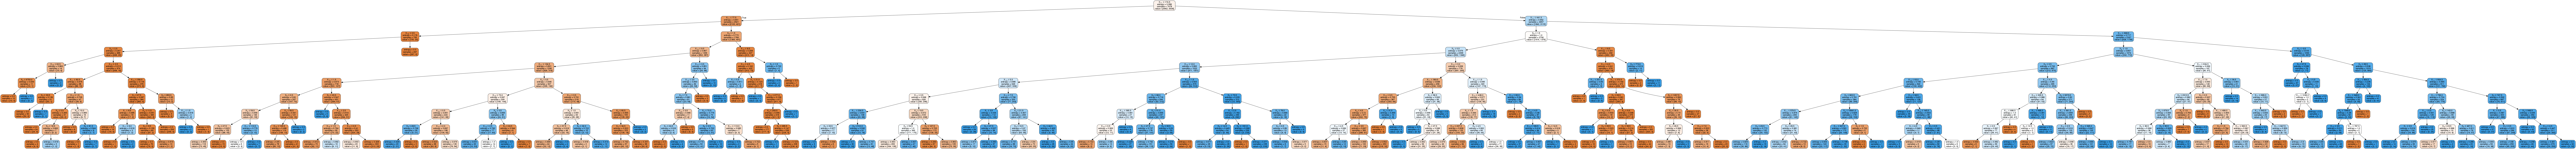

<Figure size 432x432 with 0 Axes>

In [24]:
plot_model_tree(model_dt_entropy)

# Performance Metrics

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

In [26]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.8747079431487281

In [27]:
predictions = model_dt_entropy.predict(X_test)
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [28]:
y_actual_result = y_test[0]

In [29]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [30]:
y_actual_result

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

# Recall

In [31]:
# Recall

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if(result == 1):
        count += 1
print('true-yes|predicted-yes: ', count/float(len(y_actual_result)))

true-yes|predicted-yes:  0.8393300248138957


# Area Under the Curve

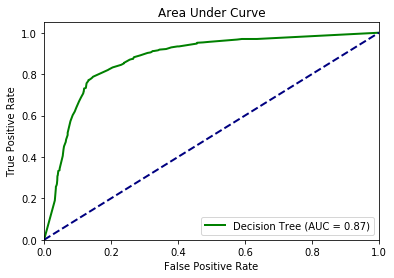

In [32]:
plt.figure(1)
plt.plot(fpr_dt, tpr_dt, color="green", lw=2, label="Decision Tree (AUC = %0.2f)" % roc_auc_dt)
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix

In [33]:
print(confusion_matrix(y_test, predictions))

[[1673  258]
 [ 400 1353]]


In [34]:
accuracy_score(y_test, predictions)

0.8213897937024973

In [43]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predictions, normalize=False):
    '''This function prints and plot the confusion matrix'''
    cm = confusion_matrix(y_test, predictions, labels=[0,1])
    classes = ['Success', 'Default']
    cmap = plt.cm.Blues
    title = 'Confusion Matrix'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[: np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True value')
    plt.xlabel('Predicted value')
    

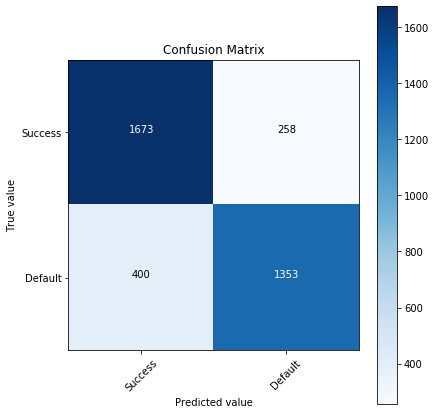

In [45]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Pruning of the tree

In [37]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)


In [38]:
print(sum(model_dt_entropy.tree_.children_left < 0))

193


In [39]:
# start pruning from root
prune_index(model_dt_entropy.tree_, 0, 5)

In [40]:
print(sum(model_dt_entropy.tree_.children_left < 0))

223


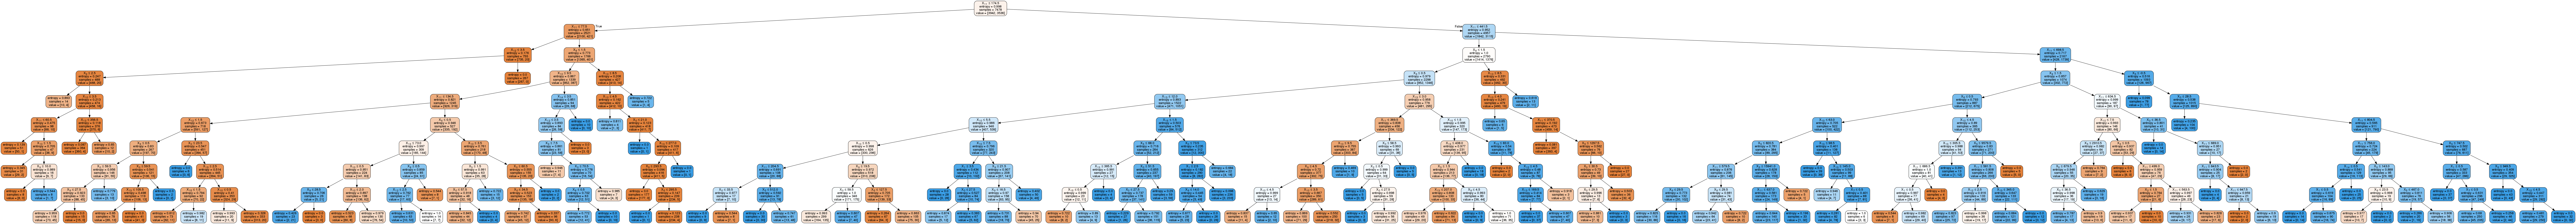

<Figure size 432x432 with 0 Axes>

In [41]:
# It means that the code has created 35 new leaf nodes 
# (by practically removing links to their ancestors). The tree, which has looked before like

plot_model_tree(model_dt_entropy, file_name='tree_optimized')

In [42]:
# Score after pruning
model_dt_entropy.score(X_test, y_test)

0.8270901194353963

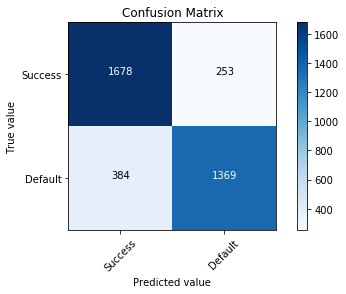

In [46]:
predictions = model_dt_entropy.predict(X_test)
plot_confusion_matrix(predictions)